In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [50]:
# Set random seed for reproducibility
torch.manual_seed(0)

# Activation Functions

In [51]:
# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [52]:
# Tanh activation
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

In [53]:
# ReLU activation
def relu(x):
    return torch.max(torch.zeros_like(x), x)

In [54]:
# Leaky ReLU activation
def leaky_relu(x, negative_slope=0.01):
    return torch.where(x > 0, x, negative_slope * x)

In [55]:
# Create input data
x = torch.linspace(-5, 5, 100)

In [56]:
x

tensor([-5.0000, -4.8990, -4.7980, -4.6970, -4.5960, -4.4949, -4.3939, -4.2929,
        -4.1919, -4.0909, -3.9899, -3.8889, -3.7879, -3.6869, -3.5859, -3.4848,
        -3.3838, -3.2828, -3.1818, -3.0808, -2.9798, -2.8788, -2.7778, -2.6768,
        -2.5758, -2.4747, -2.3737, -2.2727, -2.1717, -2.0707, -1.9697, -1.8687,
        -1.7677, -1.6667, -1.5657, -1.4646, -1.3636, -1.2626, -1.1616, -1.0606,
        -0.9596, -0.8586, -0.7576, -0.6566, -0.5556, -0.4545, -0.3535, -0.2525,
        -0.1515, -0.0505,  0.0505,  0.1515,  0.2525,  0.3535,  0.4545,  0.5556,
         0.6566,  0.7576,  0.8586,  0.9596,  1.0606,  1.1616,  1.2626,  1.3636,
         1.4646,  1.5657,  1.6667,  1.7677,  1.8687,  1.9697,  2.0707,  2.1717,
         2.2727,  2.3737,  2.4747,  2.5758,  2.6768,  2.7778,  2.8788,  2.9798,
         3.0808,  3.1818,  3.2828,  3.3838,  3.4848,  3.5859,  3.6869,  3.7879,
         3.8889,  3.9899,  4.0909,  4.1919,  4.2929,  4.3939,  4.4949,  4.5960,
         4.6970,  4.7980,  4.8990,  5.00

In [57]:
# Apply activation functions
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky_relu = leaky_relu(x)

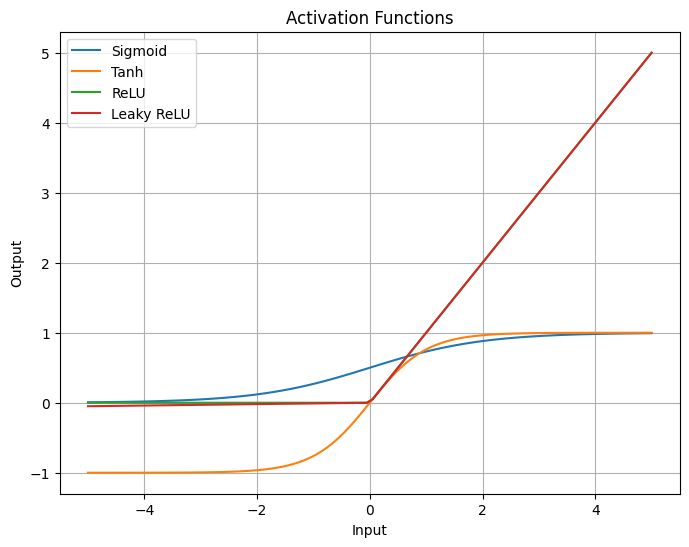

In [58]:
# Plot activation functions
plt.figure(figsize=(8, 6))
plt.plot(x.numpy(), y_sigmoid.numpy(), label='Sigmoid')
plt.plot(x.numpy(), y_tanh.numpy(), label='Tanh')
plt.plot(x.numpy(), y_relu.numpy(), label='ReLU')
plt.plot(x.numpy(), y_leaky_relu.numpy(), label='Leaky ReLU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

# Loss Functions

In [59]:
# Mean Squared Error (MSE) loss
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

In [60]:
# Binary Cross-Entropy (BCE) loss
def bce_loss(y_pred, y_true):
    return -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))

In [61]:
# Example usage of loss functions
y_true = torch.tensor([1.0, 0.0, 1.0, 0.0])
y_pred = torch.tensor([0.8, 0.2, 0.6, 0.4])

In [62]:
mse = mse_loss(y_pred, y_true)
bce = bce_loss(y_pred, y_true)

In [63]:
print(f"Mean Squared Error (MSE) Loss: {mse.item():.4f}")
print(f"Binary Cross-Entropy (BCE) Loss: {bce.item():.4f}")

Mean Squared Error (MSE) Loss: 0.1000
Binary Cross-Entropy (BCE) Loss: 0.3670


# Optimizers

In [64]:
# Stochastic Gradient Descent (SGD) optimizer
model_sgd = nn.Linear(10, 1)
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

In [65]:
# Adam optimizer
model_adam = nn.Linear(10, 1)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)

In [66]:
# Example usage of optimizers
data = torch.randn(100, 10)
target = torch.randn(100, 1)

In [67]:
for _ in range(100):
    # SGD optimizer
    optimizer_sgd.zero_grad()
    output_sgd = model_sgd(data)
    loss_sgd = mse_loss(output_sgd, target)
    loss_sgd.backward()
    optimizer_sgd.step()
    
    # Adam optimizer
    optimizer_adam.zero_grad()
    output_adam = model_adam(data)
    loss_adam = mse_loss(output_adam, target)
    loss_adam.backward()
    optimizer_adam.step()

print(f"SGD Loss: {loss_sgd.item():.4f}")
print(f"Adam Loss: {loss_adam.item():.4f}")

SGD Loss: 0.8361
Adam Loss: 0.8169


# Regularizers

In [68]:
# L1 regularization
def l1_regularization(model, lambda_l1):
    l1_reg = torch.tensor(0.0)
    for param in model.parameters():
        l1_reg += torch.sum(torch.abs(param))
    return lambda_l1 * l1_reg

In [69]:
# L2 regularization
def l2_regularization(model, lambda_l2):
    l2_reg = torch.tensor(0.0)
    for param in model.parameters():
        l2_reg += torch.sum(param ** 2)
    return lambda_l2 * l2_reg

In [70]:
# Example usage of regularizers
model = nn.Linear(10, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [71]:
lambda_l1 = 0.1
lambda_l2 = 0.01

In [72]:
for _ in range(100):
    optimizer.zero_grad()
    output = model(data)
    loss = mse_loss(output, target)
    
    # Add L1 and L2 regularization to the loss
    loss += l1_regularization(model, lambda_l1)
    loss += l2_regularization(model, lambda_l2)
    
    loss.backward()
    optimizer.step()

print(f"Loss with Regularization: {loss.item():.4f}")

Loss with Regularization: 0.8913
